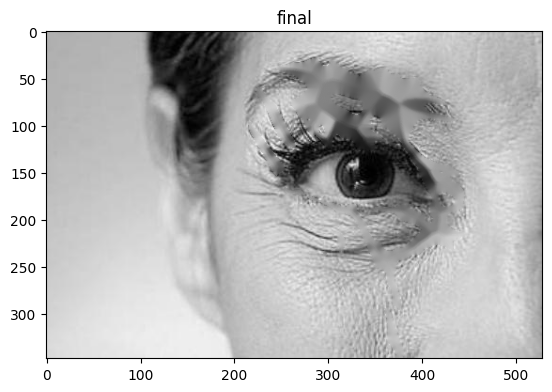

In [6]:
import cv2
import numpy as np

# 加载图像
image = cv2.imread('./2.jpg')

# 将图像转换成灰度图像
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 对灰度图像进行高斯滤波
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 使用Canny算法检测皱纹边缘
edges = cv2.Canny(blurred_image, 30, 150)

# 对皱纹边缘进行形态学闭运算
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# 使用霍夫变换检测皱纹直线
lines = cv2.HoughLinesP(closed_edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=50, maxLineGap=5)

# 将检测到的皱纹直线覆盖在原始图像上，并使用平均值平滑皱纹区域
smoothed_image = np.zeros(image.shape, dtype=np.uint8)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(smoothed_image, (x1, y1), (x2, y2), (255, 255, 255), 3)
smoothed_image = cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2GRAY)
smoothed_image = cv2.GaussianBlur(smoothed_image, (21, 21), 0)
smoothed_image = cv2.threshold(smoothed_image, 200, 255, cv2.THRESH_BINARY)[1]

# 将平滑后的皱纹区域与原始图像合并，生成去除皱纹的图像
result = cv2.inpaint(image, smoothed_image, 5, cv2.INPAINT_TELEA)

import matplotlib.pyplot as plt
plt.imshow(result)
plt.title('final')
plt.show()